1. Instalação do Ambiente

In [ ]:
!pip install ultralytics roboflow
!pip install tensorflow # Necessário apenas para exportação TFLite

from ultralytics import YOLO
from roboflow import Roboflow
import os
from google.colab import files

# Verificação de GPU
!nvidia-smi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 84.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with

2. Baixando o modelo disponível no Roboflow

In [ ]:
API_KEY = "NBuz1fzAyyvvir6ANRBW" # <--- Chave da equipe criada pelo Guto
WORKSPACE = "roverlib"
PROJECT = "red-yyvye-i0y4k"
VERSION = 2

# Download
rf = Roboflow(api_key=API_KEY)
project = rf.workspace(WORKSPACE).project(PROJECT)
dataset = project.version(VERSION).download("yolov8")  #pascal voc -> tensorflow //

# Identifica o caminho da pasta baixada automaticamente
dataset_path = dataset.location
print(f"Dataset baixado em: {dataset_path}")

# Verifica a estrutura das pastas (Train, Valid, Test)
train_dir = os.path.join(dataset_path, "train")
valid_dir = os.path.join(dataset_path, "valid")
test_dir = os.path.join(dataset_path, "test")

print(f"Diretório de Treino: {train_dir}")
print(f"Diretório de Validação: {valid_dir}")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to red-2 in yolov8:: 100%|██████████| 1866/1866 [00:00<00:00, 4019.33it/s]

Dataset baixado em: /content/red-2
Diretório de Treino: /content/red-2/train
Diretório de Validação: /content/red-2/valid


4. Treinamento do Modelo



In [ ]:


print("Iniciando treinamento YOLOv8 Nano...")

model = YOLO('yolov8n.pt')      # model='yolov8n.pt': Versão Nano (mais rápida para Raspberry Pi)

results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=100,
    imgsz=640,
    batch=32,        # Definiu tamanho do lote
    patience=20,     # Espera 20 épocas sem melhora antes de parar
    plots=True
)

Iniciando treinamento YOLOv8 Nano...
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/red-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, pe

5. Teste e avaliação

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 643.3±339.2 MB/s, size: 19.0 KB)
val: Scanning /content/red-2/valid/labels.cache... 93 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 93/93 190.5Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 2.8it/s 2.2s
                   all         93        300          1          1      0.995      0.948
Speed: 4.2ms preprocess, 5.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/runs/detect/val
Map50-95: 0.9475122185955842
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 204.0±47.2 MB/s, size: 9.7 KB)
val: Scanning /content/red-2/test/labels... 93 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━

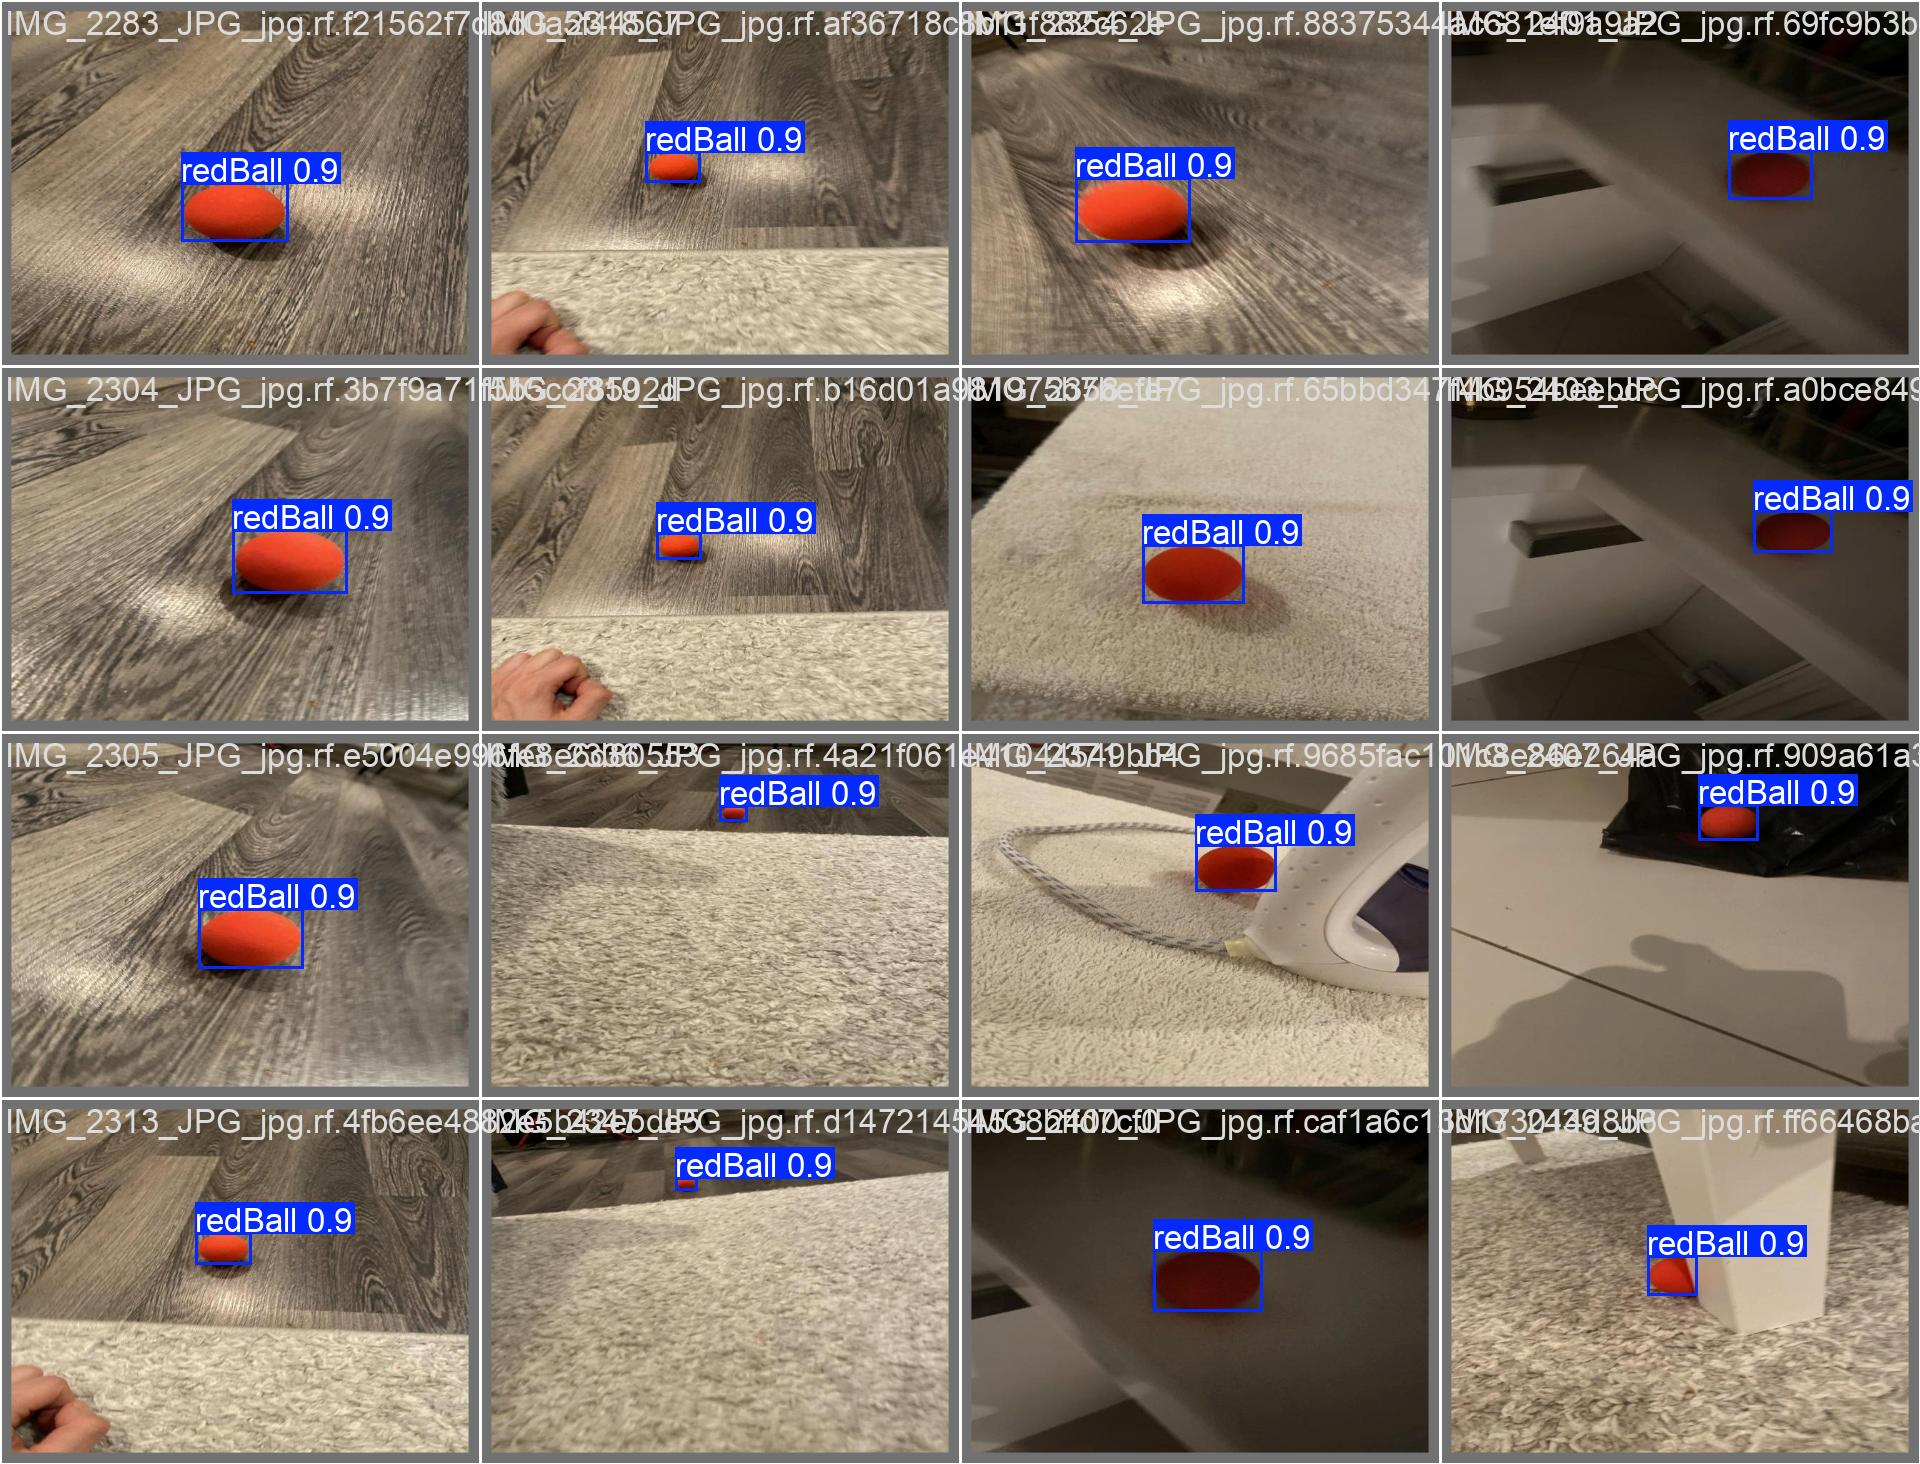

In [ ]:
metrics = model.val()

print(f"Map50-95: {metrics.box.map}") # Precisão média

metrics_test = model.val(split='test')
print(f"Precisão no mundo real: {metrics_test.box.map:.4f}")

from IPython.display import Image
Image(filename=f'{model.trainer.save_dir}/val_batch0_pred.jpg')



6. exportar para TFLite (Edge TPU / CPU)


In [ ]:
print("Exportando modelo para formato TFLite...")

# Exporta com quantização INT8 (máxima velocidade no Raspberry Pi)
# O formato 'tflite' gera um arquivo best_saved_model/best_float32.tflite ou int8
success = model.export(format='tflite', int8=True)

print(f"Local da exportação: {success}")

# O YOLO geralmente salva em runs/detect/train/weights/best_saved_model/
# Vamos encontrar e baixar o arquivo .tflite
import glob
tflite_files = glob.glob("runs/detect/train*/weights/*tflite")
if tflite_files:
    latest_file = tflite_files[0] # Pega o arquivo gerado
    print(f"Baixando: {latest_file}")
    files.download(latest_file)
else:
    print("Arquivo TFLite não encontrado no caminho padrão. Verifique a pasta 'runs'.")



Exportando modelo para formato TFLite...
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
WARNING ⚠️ INT8 export requires a missing 'data' arg for calibration. Using default 'data=coco8.yaml'.
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx>=1.12.0,<=1.19.1', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 20 packages in 2.83s
Prepared 11 packages in 5.28s
Installed 11 packages in 272ms
 + ai-edge-litert==2.0.3
 + backports-strenum==1.3.1
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==